In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
df

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


1. Visualizzare la popolazione complessiva di tutte le regioni

In [ ]:
df['totale_popolazione'].sum()


54009944

2. Visualizzare la popolazione di una regione inserita dall’utente. Controllare il dato inserito: se la regione
non esiste dare un opportuno messaggio, altrimenti dare il messaggio “La regione &lt;nome&gt; ha &lt;totale&gt;
abitanti”

In [ ]:
regione = input('inserire regione')
popolazione = df[df['nome_area']== regione].totale_popolazione.sum()
if popolazione > 0:
  print('La regione', regione, 'ha', popolazione, 'abitanti')
else:
  print('regione non presente')

inserire regioneLombardia
La regione Lombardia ha 9246804 abitanti


3. Visualizzare la popolazione di ogni regione. Visualizzare il nome della regione e il numero di abitanti.
Ordinare in ordine decrescente sul numero di abitanti (dalla regione che ha più abitanti a quella che ne
ha di meno)

In [ ]:
dfpop = df.groupby('nome_area')[['totale_popolazione']].sum().sort_values(by='totale_popolazione',ascending=False)
dfpop

,totale_popolazione
nome_area,
Lombardia,9246804
Lazio,5147533
Campania,5104347
Sicilia,4435335
Veneto,4383999
Emilia-Romagna,3998406
Piemonte,3927641
Puglia,3572053
Toscana,3360763


4. Visualizzare il grafico a barre orizzontali relativo all’esercizio 3. Inserire il titolo, i nomi degli assi e la
legenda. Fare in modo che i colori delle barre siano gradazioni dello stesso colore.

No handles with labels found to put in legend.


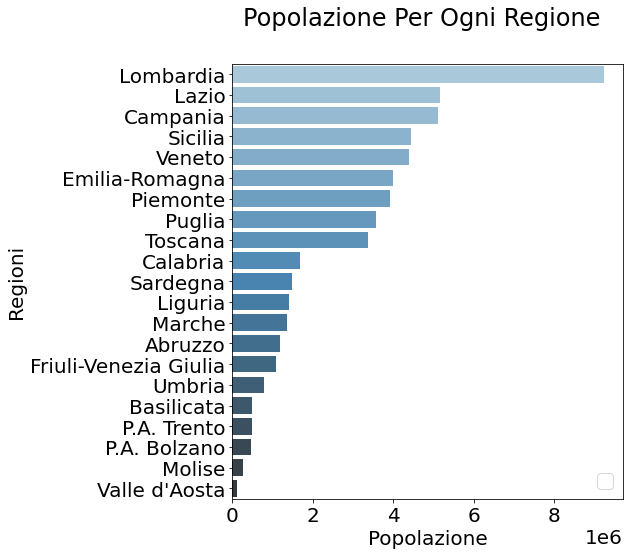

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(7,8))
ax = plt.axes()

#ax.barh(dfpop.index, dfpop['totale_popolazione'], label='Popolazione Per Ogni Regione')
sns.barplot(x=dfpop['totale_popolazione'], y=dfpop.index, palette='Blues_d')

fig.suptitle('Popolazione Per Ogni Regione')
ax.set_xlabel('Popolazione')
ax.set_ylabel('Regioni')
ax.legend(loc=0)
plt.show()

5. Eliminare la colonna ‘area’

In [ ]:
df.drop(columns='area', inplace=True)

6. Visualizzare le fasce anagrafiche che hanno un numero di persone compreso tra 5 e 7 milioni

In [ ]:
df1 = df.groupby('fascia_anagrafica')[['totale_popolazione']].sum().reset_index()
df2 = df1.loc[(df1['totale_popolazione'] <= 7000000) & (df1['totale_popolazione'] >= 5000000), ['fascia_anagrafica', 'totale_popolazione']]
df2

,fascia_anagrafica,totale_popolazione
1,20-29,6013709
2,30-39,6794332
6,70-79,6019293


7. Visualizzare il grafico a torta dei dati dell’esercizio 6. Visualizzare negli spicchi sia il numero assoluto
degli abitanti (ad esempio 4345767) sia la percentuale

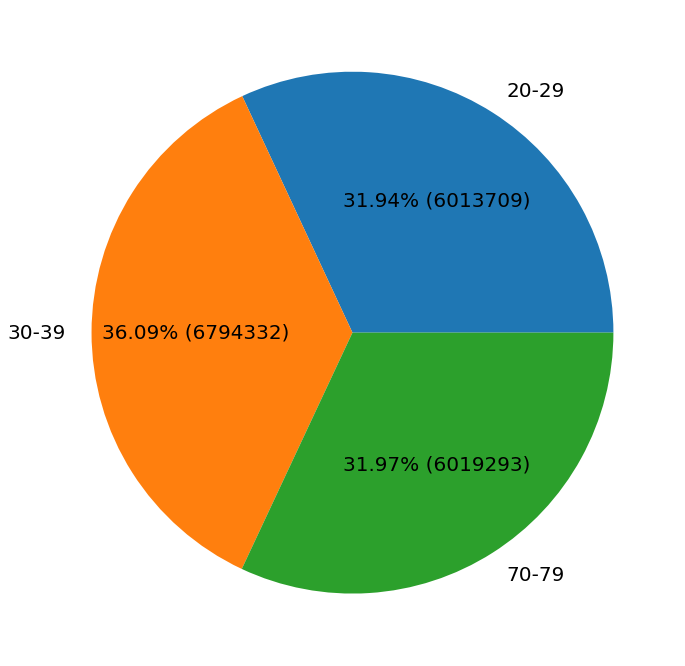

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes()

def make_autopct(values):
  def my_autopct(pct):
    total=sum(values)
    val = int(round(pct*total/100.0))
    return '{p:.2f}% ({v:d})'.format(p=pct, v=val)
  return my_autopct

values = list(df2['totale_popolazione'])
plt.rcParams.update({'font.size' : 20})




ax.pie(df2['totale_popolazione'], labels=df2['fascia_anagrafica'], autopct= make_autopct(values))
plt.show()


8. Visualizzare un nuovo grafico con i grafici precedenti. Il nuovo grafico deve avere due colonne e tre
righe e deve contenere nella prima colonna tre volte il grafico a barre e nelle seconda colonna tre volte
il grafico a torta

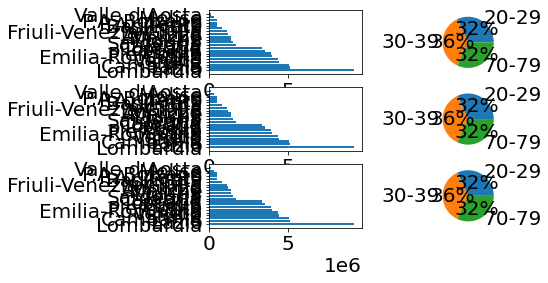

In [ ]:
fig, ((ax1,ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)
ax1.barh(dfpop.index, dfpop['totale_popolazione'])
ax2.pie(df2['totale_popolazione'], labels=df2['fascia_anagrafica'], autopct='%1.0f%%')
ax3.barh(dfpop.index, dfpop['totale_popolazione'])

ax4.pie(df2['totale_popolazione'], labels=df2['fascia_anagrafica'], autopct='%1.0f%%')
ax6.pie(df2['totale_popolazione'], labels=df2['fascia_anagrafica'], autopct='%1.0f%%')
ax5.barh(dfpop.index, dfpop['totale_popolazione'])
plt.show()




9. Salvare il grafico in un file .png

In [ ]:
fig.savefig('grafico.png')